In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from IPython.display import display, Image

# Notes on Exhibit 0293 - World's Largest Hedge Fund Is A Ponzi Scheme

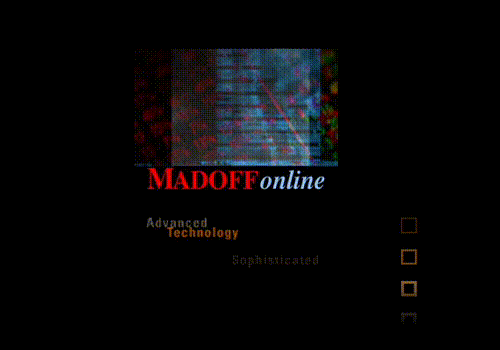

In [3]:
display(Image(filename="output.gif"))

On Monday, November 7 2005 1:49 PM Cheung, Meaghan S. sent an email to Suh, Simona that was forwarded from Harry Markopolos. Harry sent a document called "Resubmitted Madoff SEC Meeting.doc", which is the document I will be going through here. What makes this document so interesting is the mathematical modeling used to build his arguments, Harry shows a deep skill in this area of finance and I would like to deeply explore and see if we can't learn anything from it, even today. Through this document I will be building my point and calculations on specific red flags, where I either replicate, test or add on to the calculations Harry Markpolos wrote himself. You can follow along [here](https://www.sec.gov/news/studies/2009/oig-509/exhibit-0293.pdf). What makes this document really interesting is that Harry uses very intelligent argumentation and mathematics for supporting his arguments, the difficulty behind figuring out all of this by himself shows a heavy level of skill that you probably have to look long and hard for. So let's get started!

The documents starts of with the content of an email in which the sender, harry, outlines updates and clarifications regarding his analysis on why Madoff Investment Securities, LLC is likely a Ponzi scheme. He mentions improvements made over weekend to his analysis, adds pages from an offering memorandum by Fairfield Sentry as Attachment 4, and ties the entire report to Fairfield Sentry Ltd., a third-party hedge fund with over 5 billion invested in Madoff. He also includes information about whistleblower rewards under the SEC's Section 21A(e) of the 1934 Act bounty program, emphasizing that the reward applies only to insider-trading cases, based on discussions with his attorney and a deputy in the SEC's enforcement branch.

There are two potential scenarios involving fraud by Madoff Securities. The first, though unlikely, suggests that the broker-dealer and ECN might be providing stated returns to investors through front-running customer order flow, which qualifies as insider trading. This scenario could potentially qualify for a Section 21A(e) reward under the 1934 Act, allowing the SEC to pay up to 100% of total fines levied for insider trading. Approval from the SEC's Office of General Counsel, the Chairman's Office, and the bounty program administrator confirms the possibility of such rewards if insider trading is involved. However, the second scenario, which is highly likely, posits that Madoff Securities operates the world's largest Ponzi scheme. In this case, no SEC reward payment would apply, but the Harry submits the case out of moral duty, emphasizing the importance of the SEC shutting down such a massive fraud.

The politically influential Madoff family owns and operates a New York City-based broker-dealer, ECN, and what is effectively the world's largest hedge fund. Bernard "Bernie" Madoff, the patriarch, founded the firm and has been deeply involved in developing the NASDAQ stock market, serving as chairman of its board of directors and member of numerous NASD and NASDAQ, including vice chairman and various committee roles. Their extensive inolvement in financial institutions underscores their power and influence in the industry, making the alleged fraud even more concerning.

# Note on Point 2.

*I am now commenting on the second point which contains the **red flag #1**.*

If we model a scenario where the fund misses out on a 4% in average annual fee revenue, unless it's a Ponzi scheme charging more. The second point mentions that BM tells investors he's only charging undisclosed commissions. But if the fund's net returs are only 12%, the pre-fee returns must be about 16%. If we model this scenario in Python and factor in the additional fee revenue that's lost. We can model two scenarios: one with the standard fee structure (1% management fee + 20% performance fee), and another with BM's potentially undisclosed commissions, which are presumably lower. If the fund earns 16% gross returns and charges full fees, it ends up with a 12% net return (1% + 3% performance fee = 4%). If BM charges less, we're leaving 4% fee revenue on the table. We can simulate both scenarios and calculate the missing fee revenue. The second point suggests BM leaves 4% in fee revenues unless he's running a Ponzi scheme, implying that if BM charged standard fees (1% mgmt + 20% performance fees), the fee revenue would be 4%. The investor's net return is 12, indicating BM isn't capturing the full 4% fee. Simulating both situations to see the fee revenue difference, showing the missing 4% when BM charges commissions. For the fee models: one using standard hedge fund fees, where the investor net return is 12%, and one using BM's undisclosed commission rate, which might be lower. If BM charged full fees (4% revenues), the net return would still be 12%, but this revenue would be higher. For BM's scheme. using a commission rate that leaves 4% of fee revenue "on the table" (using a lower commission rate?), computing the difference between these models and simulate whether BM's commission is lower than expected. We model two cases: **(i)** for the standard hedge fund fee structure, gross annual return of 16%, management fee of 1%, performance of 20% on the profit after the management fee which yields 1 + (.20 x (.16 - .01)) = 4% in fees, so investors receive 16% - 4% = 12%, net, **(ii)** for BM commission scheme, BM states a net return of 12% to investors, in a "pure commission" model, if BM were not capturing the full 4% revenue but only collecting lower, undisclosed commissions (or even none for himself), then he would essentially be leaving that fee revenue "on the table". The code simulates both cases over a period of years, showing how the investor's capital grows and what fee revenue would be captured in the standard hedge fund model. For BM's scheme we assume the commission fee revenue is zero - i.e. the firm passes along all gains to investors even though the reported gross trading return must be high enough to mask the missing fee revenue.

In [11]:
def standard_fee_structure(gross_return, mgmt_fee=0.01, performance_fee_rate=0.20):
    # Profit after management fee:
    profit_after_mgmt = gross_return - mgmt_fee
    # Performance fee is applied on profit_after_mgmt:
    performance_fee = performance_fee_rate * profit_after_mgmt
    fee_revenue = mgmt_fee + performance_fee
    net_return = gross_return - fee_revenue
    return net_return, fee_revenue

def bm_commission_scheme(net_return_reported):
    # BM passes along the net return, so fee revenue captured is 0.
    return net_return_reported, 0.0

def simulate_growth(initial_capital, annual_return, years):
    return initial_capital * (1 + annual_return) ** years

# Parameters
gross_return = 0.16 # 16% gross return per year.
mgmt_fee_rate = 0.01 # 1% management fee
performance_fee_rate = 0.20 #20% performance fee
reported_net_return = 0.12 # Reported investor net return (12%)

# Calculate under the standard hedge fund fee model:
net_return_standard, fee_revenue_standard = standard_fee_structure(gross_return, 
                                            mgmt_fee_rate, performance_fee_rate)
print("--- Standard Hedge Fund Fee Model ---")
print("    Gross Return: {:.2%}".format(gross_return))
print("    Fee Revenue: {:.2%}".format(fee_revenue_standard))
print("    Investor Net Return: {:.2%}".format(net_return_standard))
# Expected: Fee revenue ~4% (1% mgmt + 3% performance) and net return 12%

print()

# Calculate under BM's commission scheme:
net_return_bm, fee_revenue_bm = bm_commission_scheme(reported_net_return)
print("--- BM Commission Scheme ---")
print("    Reported Investor Net Return: {:.2%}".format(net_return_bm))
print("    BM Fee Revenue Captured: {:.2%}".format(fee_revenue_bm))
# BM appears to deliver 12% net return but captures 0% fee revenue.

print()

# Simulate capital growth for both cases over a period of 10 years.
initial_capital = 1_000_000
years = 10

final_capital_standard = simulate_growth(initial_capital, net_return_standard, years)
final_capital_bm = simulate_growth(initial_capital, net_return_bm, years)

print("\nCapital Growth over {} years (starting with ${:,}):".format(years, initial_capital))
print("  Standard Fee Model: ${:,.2f}".format(final_capital_standard))
print("  BM Commission Scheme: ${:,.2f}".format(final_capital_bm))

print()

# Summary of the discrepancy:
missing_fee_revenue = fee_revenue_standard - fee_revenue_bm
print("\nDiscrepancy (Missing Fee Revenue): {:.2%} per year".format(missing_fee_revenue))

--- Standard Hedge Fund Fee Model ---
    Gross Return: 16.00%
    Fee Revenue: 4.00%
    Investor Net Return: 12.00%

--- BM Commission Scheme ---
    Reported Investor Net Return: 12.00%
    BM Fee Revenue Captured: 0.00%


Capital Growth over 10 years (starting with $1,000,000):
  Standard Fee Model: $3,105,848.21
  BM Commission Scheme: $3,105,848.21


Discrepancy (Missing Fee Revenue): 4.00% per year


For a 16% gross return, the standard model deducts a 1% management fee and a 20% performance fee on the remaining 15%, yielding a 3% performance fee. Total fees add up to 4%, resulting in a 12% net return to investors. BM's reported net return is 12%, but under this model no fee revenue is captured. In a proper hedge fund, that 4% fee revenue would be retained by the manager. Both models give investors 12% net return, so their capital grows identically, however, the standard model shows that a manager capturing fees would earn an extra 4% on the gross returns - this is the "missing" revenue when BM claims only undisclosed commissions. If BM is not capturing the extra 4% fee revenue (as a conventional hedge fund would), then either he is leaving money on the table or he must be charging ever higher commissions elsewhere to justify the numbers - which is one of the red flags cited in the SEC report.

# Point 3 - Third Parties that obtain investors

Third-party hedge funds collected investor money and secretely handed all of it to Madoff Investment Securities, with investors unaware that Bernie Madoff was managing their money. Key U.S.-based feeder funds included Fairfield Sentry Limited, Access International Advisors, Broyhill All-Weather Fund, and Tremont Capital Management, alongside multiple European investors who trusted Madoff as their top-performing manager.

In [14]:
data = {
    "Third Party": [
        "A. Fairfield Sentry Limited",
        "B. Access International Advisors",
        "C. Broyhill All-Weather Fund, L.P.",
        "D. Tremont Capital Management, Inc.",
        "E. European FOFs (Partial List)"
    ],
    "Location": [
        "11th Floor, 919 Third Avenue, New York, NY",
        "Suite 2206, 509 Madison Avenue, New York, NY",
        "Not specified",
        "555 Theodore Fremd Avenue, Rye, NY",
        "Paris, Geneva, and others (see Attachment 3)"
    ],
    "Investment Amount & Date": [
        "$5.2 billion (May 2005)",
        "$450 million (mid-2002)",
        "$350 million (March 2000)",
        "Oversees $10.5 billion (AUM)*",
        "Not specified"
    ],
    "Management/Ownership": [
        "Managed by Madoff Investment Securities, LLC",
        "Managed by Madoff Investment Securities, LLC",
        "Managed by Madoff Investment Securities, LLC",
        "Owned by Oppenheimer Funds Inc. (Mass Mutual subsidiary)",
        "Managed by Madoff Investment Securities, LLC"
    ],
    "Notes": [
        "Part of Fairfield Greenwich Group (global offices). SEC-registered advisor (Fairfield Greenwich Advisors LLC) and UK-regulated entity. Investors unaware of Madoff's role.",
        "SEC-registered. Majority of investors are European. Website: www.aiagroup.com.",
        "No additional details provided.",
        "Clients include institutions, pensions, endowments, and high-net-worth individuals. Mass Mutual under investigation by SEC, DOJ, and MA AG. Investors may be compensated via reserves.",
        "Prominent European hedge fund FOFs (2002) cited Madoff as top manager. Full list in Attachment 3."
    ]
}

df = pd.DataFrame.from_dict(data)
df

,Third Party,Location,Investment Amount & Date,Management/Ownership,Notes
0,A. Fairfield Sentry Limited,"11th Floor, 919 Third Avenue, New York, NY",$5.2 billion (May 2005),"Managed by Madoff Investment Securities, LLC",Part of Fairfield Greenwich Group (global offi...
1,B. Access International Advisors,"Suite 2206, 509 Madison Avenue, New York, NY",$450 million (mid-2002),"Managed by Madoff Investment Securities, LLC",SEC-registered. Majority of investors are Euro...
2,"C. Broyhill All-Weather Fund, L.P.",Not specified,$350 million (March 2000),"Managed by Madoff Investment Securities, LLC",No additional details provided.
3,"D. Tremont Capital Management, Inc.","555 Theodore Fremd Avenue, Rye, NY",Oversees $10.5 billion (AUM)*,Owned by Oppenheimer Funds Inc. (Mass Mutual s...,"Clients include institutions, pensions, endowm..."
4,E. European FOFs (Partial List),"Paris, Geneva, and others (see Attachment 3)",Not specified,"Managed by Madoff Investment Securities, LLC",Prominent European hedge fund FOFs (2002) cite...


# Notes on point 4 and red flag #2

What is an equity tranch? Equity trances in CLOs represent the riskiest but potentially highest-return portion of the structure, comprising 8%-10% of the capital stack ([i](https://www.barings.com/en-us/guest/perspectives/viewpoints/clo-equity-101)). Unlike debt tranches, which have credit ratings and fixed payments, equity tranches absorb losses first and are paid last in the CLO's cash-flow waterfall ([ii](https://www.lordabbett.com/content/dam/lordabbett-captivate/documents/insights/110124-Time-to-Consider-CLO-Equity-Non-US.pdf), [iii](https://www.investopedia.com/terms/c/clo.asp)). This subordinate position means equity investors face higher default risk but gain levered exposure to the underlying loan portfolio, often through ownership stakes held by the CLO manager and their third party investors, ([iv](https://www.westernasset.com/us/en/pdfs/whitepapers/guide-to-clos.pdf), [v](https://www.yieldstreet.com/blog/article/your-questions-on-collateralized-loan-obligations-clos-answered/)). Equity tranches lack credit ratings and rely on residual cash flow after senior debt obligations are met, aligning with their high-risk, high-reward profile ([vi](https://www.investopedia.com/terms/c/clo.asp), [vii](https://www.pinebridge.com/en/insights/clos-how-they-work)). 

We want to model an investment scenario where the basic idea touches on equiy tranch funding for a broker-dealer and its relationship to borrowing money. The returns range from 6.23% to 19.98% from 1990-2005, with an average of 12%. Then, with management fees, BM would need 16% returns for the investors to receive 12%. BM's scheme uses a 16% effective return after fees, whereas a typical broker-dealer borrows at LIBOR + 0.40%. I'll assume LIBOER is about 1% (back then), meaning the broker-dealer's rate is 1.4%. BM's scheme has a much higher implied rate. Simulating 12-month returns for both, adjusting for fees, comparing how the borrowing rates impact the returns, then analyzing for any discrepancies between the two funding methods. We will simulate a range of gross returns between 6.23% and 19.98% (with an average of 12%), then apply a 4% fee to see how it affects the net return where the return should be 12%, which implies a 16% gross return. In contrats, the BD model will use a borrowing rate of 1.4% which is LIBOR + 0.4% to assess how the returns compare with BM's higher borrowing cost. The model runs over 10 years.

In [17]:
# Set random seed for reproducability
np.random.seed(12)

def bm_scheme_simulation(years, initial_capital, gross_return_mean=0.16, gross_return_std=0.04,
                        mgmt_fee=0.01, performance_fee_rate=0.20):
    bm_gross_returns = np.random.normal(gross_return_mean, gross_return_std, years)
    bm_gross_returns = np.clip(bm_gross_returns, 0.0623, 0.1998)
    bm_fee_revenues = mgmt_fee + performance_fee_rate * (bm_gross_returns - mgmt_fee)
    bm_net_returns = bm_gross_returns - bm_fee_revenues
    # For consistency with the critique, we expect BM's scheme to target about 12% net annually.
    # (In our simulation, variability might shift this slightly.)
    # Simulate compound capital growth using BM net returns
    bm_net_capitals = np.empty(years + 1)
    bm_net_capitals[0] = initial_capital
    for t in range(years):
        bm_net_capitals[t+1] = bm_net_capitals[t] * (1 + bm_net_returns[t])
    return bm_net_capitals, bm_fee_revenues, bm_gross_returns, bm_net_returns

def bd_funding_simulation(years, initial_capital, bd_borrow_rate=0.014):
    """
    Simulate a scenario where a typical broker-dealer funds its operations at a cost of LIBOR+40bps

    Parameters:
    - years: number of years to simulate
    - initial_capital: starting capital
    - bd_borrow_rate: borrowing cost (e.g. 1.4% or 0.014)

    Returns:
    - bd_capitals: array of capital values over the simulation using the BD borrowing cost.
    """

    bd_capitals = initial_capital * (1 + bd_borrow_rate) ** np.arange(years+1)
    return bd_capitals

# Simulation parameters
years = 10
initial_capital = 1_000_000
# Run BM scheme simulation
bm_capitals, bm_fee_revenues, bm_gross_returns, bm_net_returns = bm_scheme_simulation(years, initial_capital)
# Run broker-dealer funding simulation (using typical cost of 1.4% per year)
bd_capitals = bd_funding_simulation(years, initial_capital, bd_borrow_rate=0.014)
# Print out the annual results
print("Year | BM Gross Return | BM Fee Revenue | BM Net Return | BM Capital      | BD Capital")
print("-----|-----------------|----------------|---------------|-----------------|-----------")
for t in range(years):
    print(f"{t+1:>4} | {bm_gross_returns[t]*100:>14.2f}% | {bm_fee_revenues[t]*100:>12.2f}% | {bm_net_returns[t]*100:>11.2f}% | ${bm_capitals[t+1]:>13,.2f} | ${bd_capitals[t+1]:>9,.2f}")
# summary
avg_bm_gross = np.mean(bm_gross_returns)
avg_bm_fee = np.mean(bm_fee_revenues)
avg_bm_net = np.mean(bm_net_returns)
print("\nSummary:")
print(f"Average BM Gross Return: {avg_bm_gross*100:.2f}%")
print(f"Average BM Fee Revenue: {avg_bm_fee*100:.2f}%")
print(f"Average BM Net Return to Investors: {avg_bm_net*100:.2f}%")
print(f"Typical BD Funding Cost (LIBOR+40bps): {1.4:.2f}%")
print("\nThe BM scheme implies that BM is effectively 'borrowing' at a rate around the gross return (≈{:.2f}%),"
      " which is far higher than the typical broker-dealer funding cost of 1.4%.".format(avg_bm_gross*100))  
###

Year | BM Gross Return | BM Fee Revenue | BM Net Return | BM Capital      | BD Capital
-----|-----------------|----------------|---------------|-----------------|-----------
   1 |          17.89% |         4.38% |       13.51% | $ 1,135,135.55 | $1,014,000.00
   2 |          13.27% |         3.45% |        9.82% | $ 1,246,599.47 | $1,028,196.00
   3 |          16.97% |         4.19% |       12.78% | $ 1,405,862.60 | $1,042,590.74
   4 |           9.20% |         2.64% |        6.56% | $ 1,498,054.10 | $1,057,187.01
   5 |          19.01% |         4.60% |       14.41% | $ 1,713,924.55 | $1,071,987.63
   6 |           9.86% |         2.77% |        7.09% | $ 1,835,422.80 | $1,086,995.46
   7 |          16.02% |         4.00% |       12.02% | $ 2,055,974.67 | $1,102,213.40
   8 |          15.52% |         3.90% |       11.62% | $ 2,294,781.71 | $1,117,644.38
   9 |          12.77% |         3.35% |        9.42% | $ 2,510,896.40 | $1,133,291.40
  10 |          19.98% |         4.80% |   

In the table, the columns show how the BM's gross returns (which average around 17%) get reduced by management and performance fees, averaging just over 4%, to leave a net return of around 13% to investors. The BM capital grows at this net rate, starting from 1 million and compounding each year. Meanwile, the BD capital column shows the broker-dealer that funds its operations at a much lower cost of about 1.4%, so its experiences slower, steadier growth. It's important to understand that these numbers is that BM is delivering very high net returns to investors (13% in this simulation), but only by first achieving extremely high gross returns (17%). This large gap between a normal broker-dealer's funding rate (1.4%) and BM's "implied borrowing cost" of roughly 17% stands out. A typical broker-dealer can raise capital cheaply in the short-term credit markets at around LIBOR plus a small spread, whereas BM's scheme effectively "pays" investors about 13% annually, which implies a gross cost of 17% when factoring in fees. This is unusual and suspicious for a regulated U.S. broker-dealer to choose such an expensive route to fund its operations. This is second red flag in SEC document, it suggest that BM might be engaging in something other than normal trading or that he could be hiding the real source and risk of the returns.

# Note on point 5

I want to present a steel-man argument for the secrecy around Bernie Madoff's role (even though, spoiler-alert... We know why the reason for the secrecy) as Fairfield Sentry's manager. *One might posit that the anonymity was strategically designed to protect trading strategies, avoid regulatory overreach, or comply with contractual obligations. If Madoff's involvement was structured as a sub-advisory relationship, disclosure might have been restricted to maintain competitive advantages or satisfy confidentiality clauses with other stakeholders. Also, avoiding public association with a high-profile manager could mitigate media scrutiny, unsolicited investor demands, or regulatory attention that might disrupt the fund's operations. The secrecy could be framed as a tactical decision to preserve flexibility, safeguard sensitive financial strategies, or adhere to complex legal frameworks governing multi-layered investment vehicles. The absence of Madoff's name in marketing materials might also reflect a deliberate effort to emphasize the fund's institutional structure over individual personalities, aligning with a broader ethos of discretion in certain hedge fund circles.*

# Note on point 6

How could we model this in python? A split-strike conversion involves buying a basket of stocks, selling OTM call options and buying OTM put options where the goal is to hedge the portfolio. The split-strike conversion combines a protective put (buying puts) and a covered call (selling calls). The strikes for the calls and puts are OTM, meaning the call strike is higher than the current stock price, and the put strike is lower. Defining the parameters, stock price ranges, strike prices for calls and puts, premium received from selling calls, and premium paid for buying puts, also the number of shares in the basket, for this model we can simplify by considering one stock for illustration purposes. For generating stock price points, using numpy to create an array of stock prices around the current price, say from 50 to 150 if the current is 100. For the stock position profit is (stock price - purchase price) x number of shares. For the short call the profix is max(stock_price - call_strike,0) x (-1) since we're selling + the premium received. For the long put the profit is max(put_strike - stock_price) - premium paid. Lastly we'll sum all components to get the total payoff.
 The split-strike conversion here would involve using index options to hedge the basket, so the payoff would depend on the index level, but the actual basket is a proxy for the index. For simplicitly, we can model the index level as the underlying.
 There parameters we should use: current price (S), call strike (K_call), put strike (P_put), call premium (C), put premium (P). Calculating the payoff for the stock is stock_payoff = stock_prices - S (assuming bought at S), the short call payoff would be -np.maximum(stock_prices - K_call,0) + C and long put payoff would be np.maximum(K_put - stock_prices,0) - P. The total payoff would be stock_payoff + short_call_payoff + long_put_payoff and we plot each component and the total. The payoff at the expiration would be: (i) Stock = S_T - S_0 (ii) Short call = -max(S_T - K_call,0) + premium received (C) (iii) Long put = max(K_put - S_T,0) - Premium paid (P) (iv) Total = (S_T - S_0) - max(S_T - K_call,0) + C + max(K_put - S_T,0) - P (v) simplify = (S_T - S_0,0) - max(S_T - K_call,0) + max(K_put - S_T,0) + (C - P). The net premium is (C - P). If C > P, the investor receives a net premium; it not, pays. Since the strategy is suppoed to have low volatility, the combination of selling calls and buying puts creates collar, which limits both upside and downside. The split-strike conversion is similar to a collar strategy.

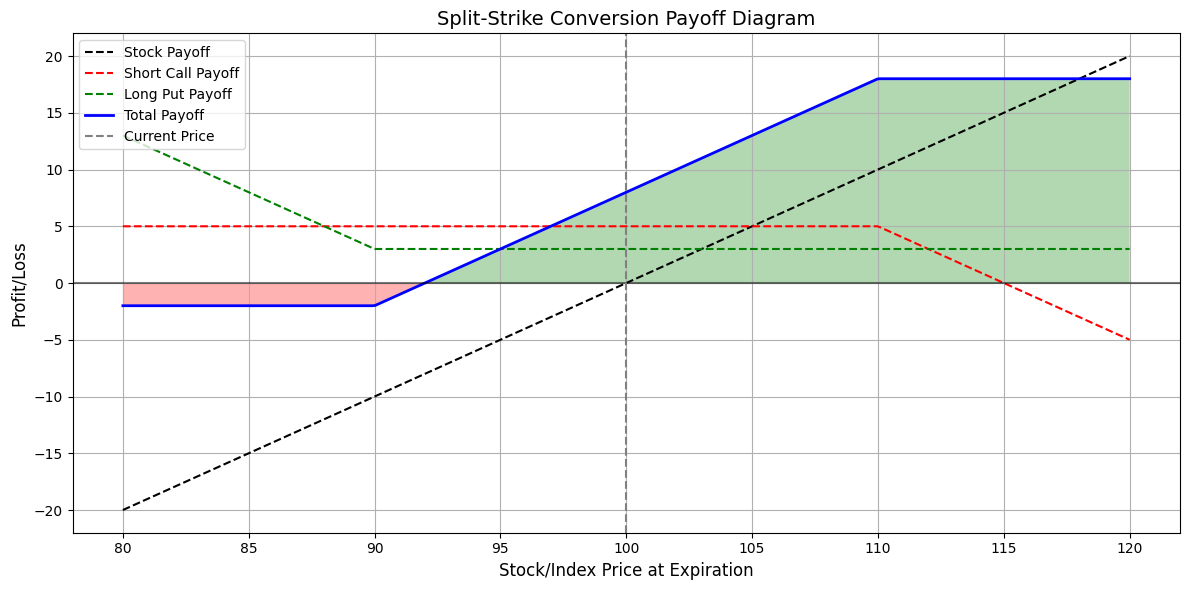

In [18]:
S0 = 100 # Current stock/index price
K_call = 110 # OTM call strike 
K_put = 90 # OTM put strike
call_premium = 5 # Premium received per call sold 
put_premium = 3 # Premium paid per put bought

# Stock price range at expiration
stock_prices = np.linspace(80, 120, 400)

# Calculate component payoffs
stock_payoff = stock_prices - S0
short_call = -np.maximum(stock_prices - K_call, 0) + call_premium
long_put = np.maximum(K_put - stock_prices, 0) + put_premium

# Total payoff (stock + short call + long put)
total_payoff = stock_payoff + short_call + long_put

# Plot
plt.figure(figsize=(12,6))
plt.plot(stock_prices, stock_payoff, 'k--', label='Stock Payoff')
plt.plot(stock_prices, short_call, 'r--', label='Short Call Payoff')
plt.plot(stock_prices, long_put, 'g--', label='Long Put Payoff')
plt.plot(stock_prices, total_payoff, 'b', lw=2, label='Total Payoff')

# Annotations
plt.axhline(0, color='black', alpha=0.5)
plt.axvline(S0, color='gray', linestyle='--', label='Current Price')
plt.fill_between(stock_prices, total_payoff, 0, where=(total_payoff >= 0), facecolor='green', alpha=0.3)
plt.fill_between(stock_prices, total_payoff, 0, where=(total_payoff < 0), facecolor='red', alpha=0.3)

plt.title('Split-Strike Conversion Payoff Diagram', fontsize=14)
plt.xlabel('Stock/Index Price at Expiration', fontsize=12)
plt.ylabel('Profit/Loss', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

This strategy aims to reduce risk by hedging the portfolio with options. The total payoff curve flattens between the put and call strikes, indicating limited profit but also reduced volatility. The net premium received from selling calls and paying for puts influences the breakeven points. If the call premium exceeds the put premium, the investor receives a net premium, enhancing the strategy's appeal for those prioritizing risk management over unlimited upside.

# Note on point 7, (A)1->3 and Red Flag #4

The model begins by quantifying the three income streams Madoff allegedly relied on: dividends (2% annual), OTM call option sales (2% annual to meet the claimed 16% net return). We could simulate the compounding effect of these returns over a decade, contrasting them with a "realistic" scenario where stocks only return 8% annually (matching historical averages like the S&P 500). The model subtracts an 8% annual cost for put options, reflecting the strategy's hedging expenses. This framework isolates the mathematical impossibility of achieving 16% returns without Madoff's purported stock-picking miracle (20% annual gains), which would require him to outperform legendary investors consistently for decades. The results starkly highlight the disconnection between Madoff's claims and reality. The model shows that even with ideal conditions (20% stock returns), the net return matches his claimed 16%, but this assumes an unrealistic and historically unprecedented performance. In contrast, a realistic 8% stock returns yields only ~4% net annually, trailing T-bills (3%) and exposing the strategy's failure to generate meaningful risk-adjusted returns. Also, the model's limitations also expose structural flaws in the strategy's execution. Madoff's claimed 20-50 billion AUM would require trading in OEX index options worth **multiple times the exchange-traded market's capacity** (e.g., 9 billion notional in 2005). Even using OTC derivatives, such volumes would strain liquidity and draw scrutiny, yet no records confirm this activity. This discrepancy suggests fraud: either Madoff fabricated trades to exaggerate returns or used illegal over-leverage. The secrecy around his strategy's mechanics further aligns with these suspicions, as legitimate funds typically publicize successful strategies to attract investors. From the analysis it is demonstrated that Madoff's returns were mathematically unsustainable under conventional investing principles. The required 20% annual stock returns are implausible, the hedging costs erode profitability, and the open interest mismatch hints at systemtic fraud. These factors, combined with his secrecy, paint a picture of a Ponzi scheme rather than a viable trading strategy.

bm_net_return = 0.16000000000000003
real_net_return = 0.039999999999999994



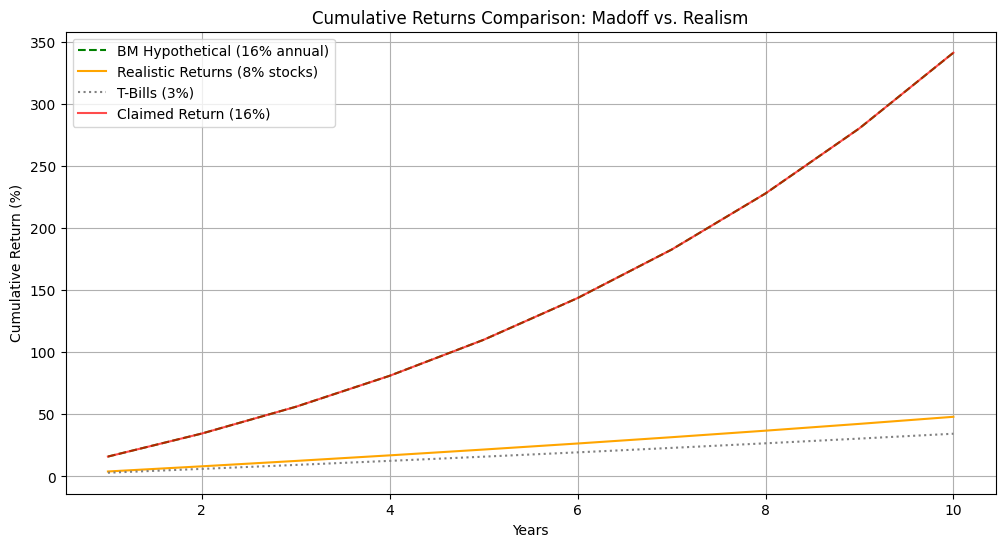

In [20]:
# Parameters
years = 10 # analysis period
annual_periods = np.arange(1, years + 1)
# Component returns (annual %)
dividend_return = 0.02 # (1) Dividends
call_income = 0.02 # (2) OTM call sales 
stock_return_bm = 0.20 # (3) Required stock returns (20% to hit 16% net)
stock_return_real = 0.08 # Realistic stock returns (e.g., S&P 500)
put_cost = 0.08 # Put option cost 
t_bond = 0.03 # T-bill return (benchmark)# Calculate net returns for each scenario 
bm_net_return = dividend_return + call_income + stock_return_bm - put_cost
real_net_return = dividend_return + call_income + stock_return_real - put_cost
print(f"bm_net_return = {bm_net_return}")
print(f"real_net_return = {real_net_return}")

print()

# Function to compute cumulative returns
def compound_return(annual_return, periods):
    return (1 + annual_return)**periods - 1

# Compute cumulative returns over 10 years 
bm_cum = compound_return(bm_net_return, annual_periods)
real_cum = compound_return(real_net_return, annual_periods)
t_bond_cum = compound_return(t_bond, annual_periods)
claimed_cum = compound_return(0.16, annual_periods)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(annual_periods, bm_cum * 100, label='BM Hypothetical (16% annual)', linestyle='--', color='green')
plt.plot(annual_periods, real_cum * 100, label='Realistic Returns (8% stocks)', color='orange')
plt.plot(annual_periods, t_bond_cum * 100, label='T-Bills (3%)', linestyle=':', color='gray')
plt.plot(annual_periods, claimed_cum * 100, label='Claimed Return (16%)', color='red', alpha=0.7)
plt.xlabel('Years')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns Comparison: Madoff vs. Realism')
plt.legend()
plt.grid(True)
plt.show()

(i) *Stock-Picking Impossibility* - To achieve 16% net returns, the strategy requires 20% annual stock returns, far exceeding historical benchmarks (e.g., the S&P500 ~8% average). This would make Madoff the best stock picker in history, which contradicts his obscurity in investment circles (ii) *Risk vs. Reward* - The "realistic" scenario (8% stock returns) yields only ~4% net annual returns, far below T-bills (3%) and Madoff's claims. This exposes the strategy's inherent limitations: it cannot generate high returns without unsustainable stock performance or exploiting market anomalies (iii) *Open Interest Discrepancy* - The model also highlights the open interest issue the analysis. Madoff's purpose 20-50 billion AUM would require OTC option volumes far exceeding the exchange-traded OEX market (e.g. 9 billion notional in 2005). This implies either illegal over-leverage, manipulation, or fictitious positions. The model proves that even with ideal conditions, the strategy cannot achieve Madoff's returns without 20% annual stock picking, which is statisitically implausible. The lack of transparency in fund management aligns with the strategy's structural flaws. Madoff likely concealed his role to avoid scrutiny over his inability to justify returns through conventional means. The limited liquidity in exchange-traded options (vs. his AUM) suggests he either relied on fraudulent OTC trades or fabricated returns entirely. This model points out why the strategy is **fundamentally unviable**, reinforcing the suspicion of fraud in Madoff's operations.

# Model on red flag #5

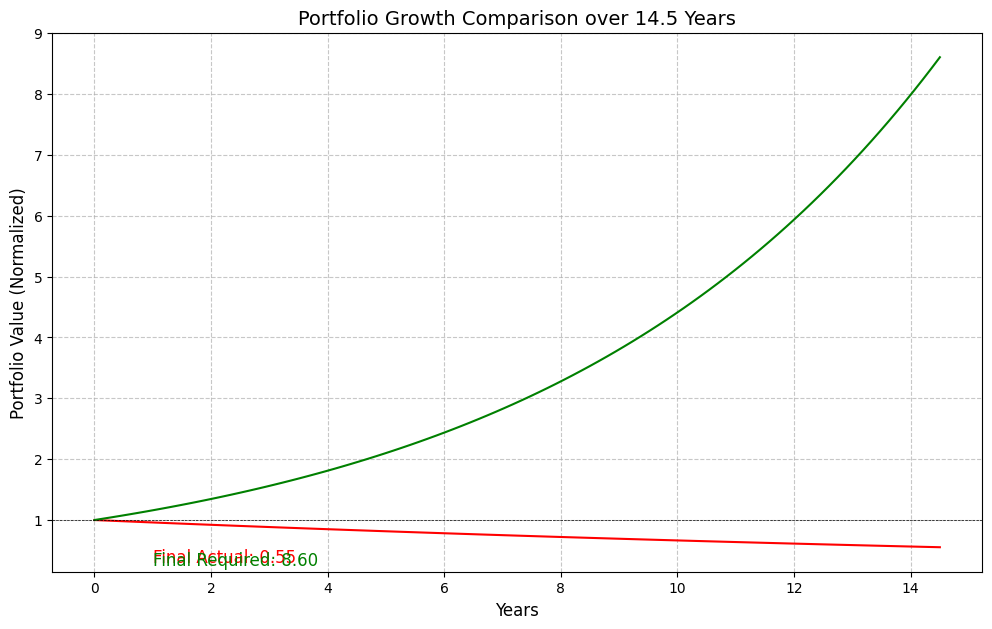

In [21]:
# Parameters
years = 14.5
initial_investment = 1.0 # Normalized initial investment.
annual_return_actual = -0.04 # 2% dividends + 2% call income - 8% put cost
annual_return_required_gross = 0.16 # Required gross return to net 12% after 20% fees 

# Generate time points for smooth plotting 
time = np.linspace(0, years, 100)

# Calculate portfolio values over time 
value_actual = initial_investment * (1 + annual_return_actual) ** time 
value_required = initial_investment * (1 + annual_return_required_gross) ** time 

# Plotting 
plt.figure(figsize=(12,7))
plt.plot(time, value_actual, label='Actual Strategy (-4% Annual)', color='red')
plt.plot(time, value_required, label='Required Gross (16% annual)', color='green')
plt.title("Portfolio Growth Comparison over 14.5 Years", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Portfolio Value (Normalized)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(1, color='black', linewidth=0.5, linestyle='--')  # Baseline for initial investment

# Calculate and display final values
final_actual = initial_investment * (1 + annual_return_actual) ** years
final_required = initial_investment * (1 + annual_return_required_gross) ** years

plt.text(1, 0.3, f'Final Actual: {final_actual:.2f}', fontsize=12, color='red')
plt.text(1, 0.25, f'Final Required: {final_required:.2f}', fontsize=12, color='green')

# build dataframe 

df = pd.DataFrame(time, value_actual)

plt.show()

# Note on red flag #6

or the sixth red flag I want to build out some arguments and alternative scenarios, because I do think the way Harry constructed this paragraph could lead to some inconsistencies. To start of, **(i)** *Could Madoff have accessed deeper or different derivative markets?* Madoff's claim was that he was using OEX options for the split-strike strategy, but one could ask: Could he have just as easily used S&P500 (SPX) or E-mini options? The S&P500 is a much larger market. SPX options and E-mini options often have higher open interest and daily volume, also, Madoff never seems to have given precise transparency on which exact options (or in what market) he was operating. It could be an oversight to make the assumption that S&P100 was the only option set to be used in accordance to BM. **(ii)** OTC options - Markopolos says the OTC market is not larger than the listed market for "plain vanilla" index puts - but that would be something that depends on which product, which counterparty network, and the time frame. Even if consider listed volumes to be robust, there are legitimate OTC trades (e.g. large block-trades, multi-bank prime brokerage relationships) that could give Madoff more capacity to lay off that risk. A skeptic would ask: *If Madoff indeed had prime brokerage relationships with large banks, might they have structured custom options, total return swaps, or other instruments for him that simply do not appear in listed open-interest figures?*, but Markpolos points out, using OTC for all of that size would still be an extremely large position. It likely would have shown up somewhere, for example in counterparties' risk reports or in BD data. **(iii)** Rolling and layering positions vs. snapshot open interest - Markopolos uses a snapshot of open interest on one specific date. In practice, large option-based strategies often roll into new strikes or new maturities over time, which might never appear fully in open interest at one moment, a manager could argue here that perhaps Madoff was rolling weekly or monthly positions, so he never needed to carry the entire notional of puts all at once, but if one's entire portfolio is always hedged, you typically would see consistently large open interest. You know? Maybe Madoff had a dynamic or partial hedge (buying fewer puts and then dynamically adjusting?). It would mean his strategy is not a "textbook" split-strike but something more actively traded? Still, this begs the question $\rightarrow$ *How does he consistently show low volatility returns if the hedge is partial?* **(iv)** *Could he have used a different structure entirely?* Madoff could have used knock-out options, barrier options, or var swaps, for instance, sold to him by a large investment bank. If he did that, you wouldn't see the positions in OEX open interest. However, the marketing literature described a fairly straightforward split-strike approach - not complex exotics that deviate from standard OEX index puts. Synthetic Collars via Futures and Options? Instead of long index puts, Madoff might have short index futures positions or a combination of single-stock put options. It's not what marketing claimed, but professionals know there are multiple ways to replicate a downside hedge, the question remains! Could all of it have been hidden? Doing so with billions under management is tought without eventually creating footprints somewhere else in the market. **(v)** Matching the hedge size with the equity notional - "Over 100% of total open interest", Markopolos stated that if Madoff actually had 20-30 billions of equities, he would need more OEX puts than existed in the entire market. That is a big red flag because: (1) Exchange-traded open interest is not typically off by an order of magnitude, (2) Even a partial offset in the OTC market would be large enough to create waves in the prime brokerage system, and (3) If Madoff was the only buyer for so many OEX puts, you'd expect volatility to spike or premiums to skyrocket. Madoff could, in theory, net exposures if he had offsetting positions in other parts of the portfolio (example: if he were short other correlated instruments). But again, that's not in line with a plain-vanilla, collar-type strategy described to investors. **(vi)** Real-world trading footprints - even if a strategy is feasible in theory, the liquidity constraints of acquiring so many put options each month or quarter would be enormous. Someone would notice, from the largest BD to the floor traders on the CBOE, and the lack of price impact, if Madoff were puttiung on huge positions, the implied volatilities for OEX options would likely reflect it. Yet the market didn't show persistent anomalies that one would expect from such sustained demand for puts. **(vii)** Where Harry might have been cautious or incomplete? Harry presumes the entire collar is done in OEX listed puts, if Madoff had swapped to the S&P 500 or used a rolling schedule, that might mitigate some of Markopolos's claims, but not to the point of eliminating the entire shortfall. An All-or-Nothing comparison - He uses one date's open interest. In reality, a manager might use a combination of listed and OTC; they might stagger the maturities. Harry's argument is sound in principle - there isn't enough capacity to do the entire hedge in OEX at once - but one must be careful about the literal "not enough puts in existence" if Madoff was (hypothetically) creative enough to spread trades across other products or timelines. **(viii)** Final Thoughts - Even if there were some "alternative channel" (OTC or SPX), you would expect to see *some footprint* in implied volatility or open interest - especially when we're talking about tens of billions. Rolling or layering positions can reduce the open interest one observes at a single moment in time, but it can't make a multi-billion-dollar hedge completely invisible. Using structured or exotic options outside the plain-vanilla listing could hide some activity, but it becomes questionable why Madoff would market a "simple split-strike conversion" if he was actually doing something far more complex. Harry Markopolos's central point - that there is simply not enough listed OEX option volume/open-interest to match Madoff's adverstied size - remains a powerful red flag, even after acknowledging these nuances. In hindsight, Markpolos was correct to highlitht the mismatch in listed option liquidity. An experienced derivatives manager might grant that it's possible in theory to use other instruments or markets - but at Madoff's scale, that sort of volume would have been a blinking neon sign to all market participants, and nobody saw it. It strongly supports the conclusion that the "split-strike conversion" explanation was a cover for a strategy that, as we now know, never actually took place.

# Notes on #7 #8 #9

**(i)** Trading 20-50 billion monthly in OTC options through two brokers is unprecented. OTC markets, while customizable, lack the liquidity of listed markets. Such massive trades would face prohibitive bid-ask spreads, eroding profitability **(ii)** The claim that OTC put options cost ~8% annually (even for ATM, one-year holds) aligns with typical premiums for tailored derivatives. For BM to profit, its call sales would need to offset these costs, which is unlikely given the scale and transaction costs. **(iii)** UBS and Merrill Lynch credit departments would unlikely approave such large exposures withour robust hedging. If they cannot demonstrate offsetting possitions, this suggests potential complicity in a fraud. The SEC should demand trade tickets and verify hedging strategies. Failure to produce these would indicate misconduct. **(iv)** Brokers shorting OTC puts would need to hedge via listed derivatives or futures. However, the sheer size of BM's trades would overwhelm market liquidity, leading to slippage and unsustainable costs. Index futures and listed options lack the depth to absorb 20-50B/month in hedging activity without disrupting prices. **(v)** If BM cannot hedge via listed options, the reliance on OTC becomes a necessity - but at a cost that mathematically precludes profitability. This contradiction implies either flawed strategy claims or fabrication.

# Replicating Harry's model for analyzing the value of front-running - red flag #13

In [24]:
# Paremeters
S = 46 # stock price 
X = 46 # Stock price (ATM)
r = 0.058 # Risk-free rate (5.8%)
sigma = 0.5 # Volatility (50%)
trading_days = 253
minutes_per_day = 390 # 6.5 hours/day 60 minutes/hours

# Time intervals in minutes
time_intervals = [1, 5, 10, 15]

# Convert minutes to years 
def minutes_to_years(minutes):
    return minutes / (trading_days * minutes_per_day)

# Black-Scholes formula for call option
def black_scholes(S, X, r, sigma, t):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    N_d1 = 0.5 * (1 + math.erf(d1 / np.sqrt(2)))
    N_d2 = 0.5 * (1 + math.erf(d2 / np.sqrt(2)))
    call = S * N_d1 - X * np.exp(-r * t) * N_d2
    return call

# Calculate option values for each value 
results = {}
for t_min in time_intervals:
    t = minutes_to_years(t_min)
    call_value = black_scholes(S, X, r, sigma, t)
    results[f"{t_min} minute"] = call_value

print("Time Interval | Option Value ($)")
print("--------------------------------")
for interval, value in results.items():
    print(f"{interval.ljust(14)} | ${value:.2f}")

Time Interval | Option Value ($)
--------------------------------
1 minute       | $0.03
5 minute       | $0.07
10 minute      | $0.09
15 minute      | $0.11


# Notes on red flag #16-19

To these red flags I would like to present some devil's advocate arguments - **(i)** *Market-Timing Ability (Red Flag #16)* - Madoff's ability to go 100% cash before market declines could be attributed to a sophisticated risk management system than fraudulent activitiy. Market timing is possiuble, especially for someone with deep industry connections and access to insider information. The lack of verification from exchanges doesn't necessarily imply fraud. Custodial banks and broker-dealers may not always report every trade, especially for large players like Madoff, who could negotiate confidentiality agreements. **(ii)** *Lack of Outside Audits (Red Flag #17):* Allowing only internal audits might have been a legitimate measure to protect intellectual property. Many firms, especially those with proprietary trading strategies, restrict external access to sensitive data to prevent com competitive disadvantages. The decision to proceed with an investment depsite the refusal for external audits could indicate the FOF's confidence in Madoff's reputation adn performance track record, which was highly regarded at the time. **(iii)** *Inconsistent Returns with Gateway Option Income Fund (Red Flag #18)* - Madoff's returns could be superior due to a more efficient implementation of the same strategy, possibly leveraging better execution capabilities or lower transaction costs. The Gateway Option Income Fund might have faced operational inefficiencies or higher expenses, leading to power returns compared to Madoff's more streamlined approach. **(iv)** *High returns compared to other IPO Option Income Funds (Red Flag #19)* - Madoff's strategy could have included more aggressive or innovative tactics that weren't replicated by the newer funds. Publicly traded funds often have additional constraints and regulatory overhead that private funds like Madoff's do not. The cost of index put options could be justified by the protection that they provide, ensuring stability even in volatile markets, which may have been contributed to Madoff's consistent returns. **(v)** *Perfect Track Record (Flag #16, #18, and #19)* - Madoff's consistent returns over decades could be due to a combination of skill, amrket insight, and strategic hedging. While unsusual, it's not impossible for exceptionally talented traders to maintain such a record. The financial industry is complex, and anomalies can occur without necessarily indicating fraud, especially when combined with a strong historical track record and reputable clients. **(vi)** *Regulatory Environment (Red Flag #16, #17, #18, #19)* - The regulatory environment at the time might have been less stringent, allowing Madoff to operate without the scrutiny that would have uncovered his fraud earlier. Investors and institutions might have been more willing to overlook certain red flags due to Madoff's established reputation and the attractiveness of his returns. Also, **What could Bernia have done more effectively to avoid detection?** ---> **(i)** *Enhanced Transparency and Compliance* - Implementing more transparent practices, such as allowing independent audits or providing more detailed performance reports, could have helped in building trust and deflecting suspicion. **(ii)** *Better Risk Management Documentation* - Maintaining thorough records of trades and risk management decisions, including market-timing strategies, could have provided a plausible explanation for his performance and reduced skepticism. **(iii)** *Diversification of Strategies* - Introducing a broader range of investment strategies could have made his returns appear less suspicious and more in line with industry norms. **(iv)** *More Robust Internal Control* - Establishing stronger internal controls and oversight mechanisms could have halped in maintaining consistency and reducing the likelihood of discrepenacies being noticed. **(v)** *Improved Client Communication* - Providing a more detailed and regular communication with clients about the underlying strategies and risks could have built stronger relationships and trust.

# Conclusion

For this me, this is a very interesting document to go through because of the genius use of mathematical modelling used in to support his arguments. Also, the Madoff sacandal teaches critical lessons on the importance of rigorous due diligence and regulatory oversight in financial markets. Despite clear warnings and substantial evidence provided by whistleblowers like Harry, regulatory bodies failed top act timely, showing systemic vulnerabilities and emphasizing the importance of skepticism toward consistently high returns with minimal transparency. Ultimately, it shows the need for investors, financial institutions, and regulators to verify claims meticulously and maintain vigilance to prevent such massive frauds from occurring again.

You can visit https://www.madofftrustee.com/ to see how much has been recovered!